Ahmad Raza

Mail : theahmadraza47@gmail.com

Data Science Internship

                House Price Analysis and Prediction

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

step 1 : Data Cleaning and Exploration

Load the Dataset

In [39]:
# Load the dataset
file_path = 'zameen-updated.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())
print(data.info())


   property_id  location_id  \
0       237062         3325   
1       346905         3236   
2       386513          764   
3       656161          340   
4       841645         3226   

                                            page_url property_type     price  \
0  https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat  10000000   
1  https://www.zameen.com/Property/e_11_2_service...          Flat   6900000   
2  https://www.zameen.com/Property/islamabad_g_15...         House  16500000   
3  https://www.zameen.com/Property/islamabad_bani...         House  43500000   
4  https://www.zameen.com/Property/dha_valley_dha...         House   7000000   

      location       city      province_name   latitude  longitude  baths  \
0         G-10  Islamabad  Islamabad Capital  33.679890  73.012640      2   
1         E-11  Islamabad  Islamabad Capital  33.700993  72.971492      3   
2         G-15  Islamabad  Islamabad Capital  33.631486  72.926559      6   
3    Bani Gala  Islamaba

Handle Inconsistencies

In [40]:
# Handle missing values in 'agency' and 'agent' columns
# For now, we can fill missing values with 'Unknown'
data['agency'].fillna('Unknown', inplace=True)
data['agent'].fillna('Unknown', inplace=True)

C:\Users\p\AppData\Local\Temp\ipykernel_2152\4182615349.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['agency'].fillna('Unknown', inplace=True)
C:\Users\p\AppData\Local\Temp\ipykernel_2152\4182615349.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [41]:
# Convert 'date_added' to datetime format
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

Handle Missing Values

In [42]:
# Check for any remaining missing values
missing_values = data.isnull().sum()
# Display the number of missing values per column
print(missing_values)

property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
Area Type        0
Area Size        0
Area Category    0
dtype: int64


Identify and Handle Outliers

In [43]:
#Using Z-score to identify outliers
from scipy import stats
data = data[(np.abs(stats.zscore(data['price'])) < 3)]

Step 2 :  Data Exploration

Distribution of House Prices

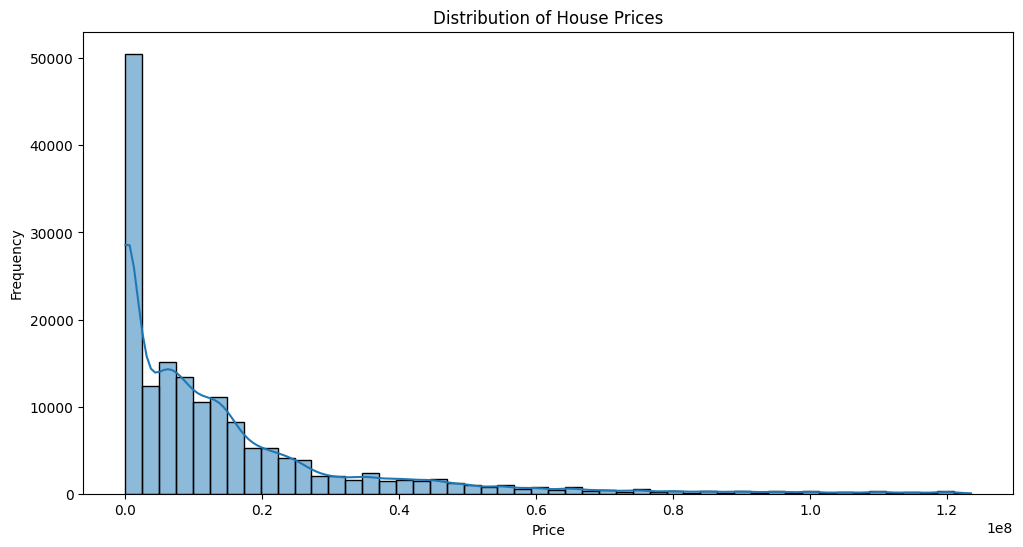

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of house prices
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Scatter Plots and Box Plots

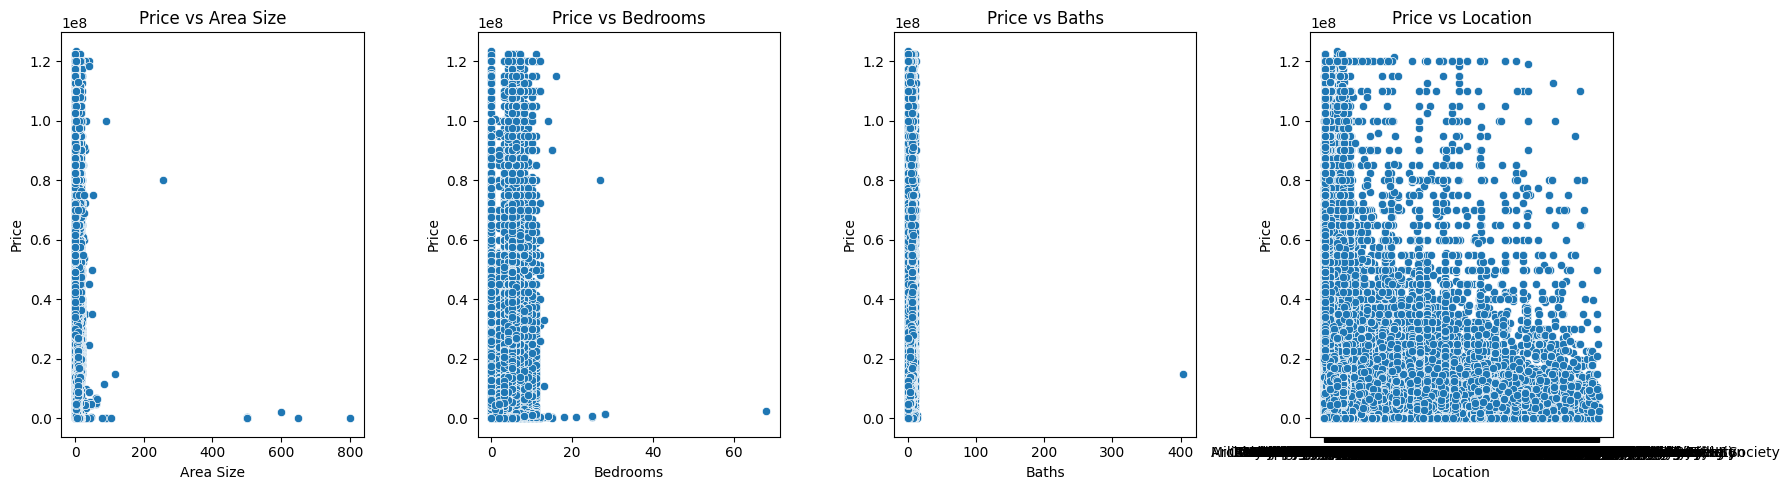

In [45]:
# Scatter plots for house price vs. numerical features
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Scatter plot for Price vs. Area Size
sns.scatterplot(ax=axes[0], x='Area Size', y='price', data=data)
axes[0].set_title('Price vs Area Size')
axes[0].set_xlabel('Area Size')
axes[0].set_ylabel('Price')

# Scatter plot for Price vs. Bedrooms
sns.scatterplot(ax=axes[1], x='bedrooms', y='price', data=data)
axes[1].set_title('Price vs Bedrooms')
axes[1].set_xlabel('Bedrooms')
axes[1].set_ylabel('Price')

# Scatter plot for Price vs. Baths
sns.scatterplot(ax=axes[2], x='baths', y='price', data=data)
axes[2].set_title('Price vs Baths')
axes[2].set_xlabel('Baths')
axes[2].set_ylabel('Price')

# Scatter plot for Price vs. Location (example)
sns.scatterplot(ax=axes[3], x='location', y='price', data=data)
axes[3].set_title('Price vs Location')
axes[3].set_xlabel('Location')
axes[3].set_ylabel('Price')

plt.tight_layout()
plt.show()


Step 3 :  Feature Engineering

Create New Features

In [46]:
# Example: Age of the house
data['house_age'] = 2024 - pd.to_datetime(data['date_added']).dt.year

# Example: Number of bedrooms per floor
data['bedrooms_per_floor'] = data['bedrooms'] / data['Area Type'].apply(lambda x: 1 if x == 'Kanal' else (x == 'Marla'))

Encode Categorical Features

In [47]:
data = pd.get_dummies(data, columns=['location'], drop_first=True)

Step 4 : Outlier Analysis

Identify Outliers

In [48]:
# Using Z-score again to identify outliers
data['zscore'] = stats.zscore(data['price'])
outliers = data[abs(data['zscore']) > 3]
print(outliers)

        property_id  location_id  \
17          2230469         9057   
22          2651838          340   
28          3098002         3299   
58          1402784          514   
164         1631292         1483   
...             ...          ...   
168200     17353986          469   
168201     17353988         1447   
168248     17354070            9   
168352     17354836         1503   
168414     17356979         1447   

                                                 page_url property_type  \
17      https://www.zameen.com/Property/dha_defence_ph...         House   
22      https://www.zameen.com/Property/islamabad_bani...    Farm House   
28      https://www.zameen.com/Property/f_6_f_6_1_bran...         House   
58      https://www.zameen.com/Property/lahore_upper_m...         House   
164     https://www.zameen.com/Property/d_h_a_dha_phas...         House   
...                                                   ...           ...   
168200  https://www.zameen.com/Property/la

Investigate Reasons for Outliers

In [49]:
# Examine features of outliers
print(outliers.describe())

        property_id   location_id         price     latitude    longitude  \
count  4.117000e+03   4117.000000  4.117000e+03  4117.000000  4117.000000   
mean   1.537353e+07   3010.400534  9.392558e+07    28.408276    70.213674   
min    1.402784e+06      4.000000  7.260000e+07    24.751578    66.984801   
25%    1.455329e+07   1454.000000  8.000000e+07    24.821639    67.064323   
50%    1.633946e+07   1484.000000  9.100000e+07    24.941744    67.181485   
75%    1.701318e+07   3443.000000  1.050000e+08    31.500775    74.211559   
max    1.735698e+07  13726.000000  1.235000e+08    33.762376    74.482402   
std    2.393446e+06   3122.711661  1.455491e+07     3.869279     3.371401   

             baths     bedrooms                     date_added    Area Size  \
count  4117.000000  4117.000000                           4117  4117.000000   
mean      4.454214     5.067282  2019-05-24 05:26:20.082584320     3.654676   
min       0.000000     0.000000            2018-08-07 00:00:00     0.

Step 5 : Predictive Modeling

Train a Machine Learning Model using Sklearn

In [51]:
# Split data into features and target variable
X = data.drop(['price', 'zscore'], axis=1)
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Machine Learning Models

# Define the numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate the models
results = {}
for name, model in models.items():
    # Create and evaluate the pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R2': r2}

# Display the results
for name, metrics in results.items():
    print(f"{name} - MSE: {metrics['MSE']}, R2: {metrics['R2']}")


Step 6 : Future Price Prediction

In [ ]:
example_data = pd.DataFrame({
    'Area Size': [10],
    'bedrooms': [3],
    'baths': [2],
    'house_age': [10],
    'bedrooms_per_floor': [1],
})

# Using the Random Forest model for prediction
example_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', models['Random Forest'])])
example_pipeline.fit(X_train, y_train)

# Predicting the price
predicted_price = example_pipeline.predict(example_data)
print(f"Predicted price for the example house: {predicted_price[0]}")